In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

import os

In [2]:
transform_orig = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
transform = transforms.Compose(
    [#transforms.RandomAffine(degrees=30, translate=(0.01, 0.01), scale=(0.9, 1.1),
     #                                               shear=None, resample=0, fillcolor=0),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 6

trainset = torchvision.datasets.CIFAR10(root='./data-cfar10', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data-cfar10', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

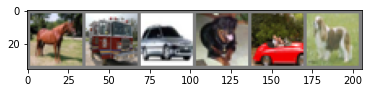

horse truck   car   dog   car   dog


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [5]:
w = torch.empty(32,32,3)
#w = torch.empty(32, 32, 3)
nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))


tensor([[-6.9011e-03],
        [ 1.0636e-04],
        [-1.1424e-01],
        [ 1.0850e-01],
        [-1.1366e-01],
        [ 8.0171e-02],
        [ 8.4032e-03],
        [-3.4441e-02],
        [-1.4566e-01],
        [ 1.6320e-01],
        [-5.8060e-02],
        [ 2.7570e-02],
        [-5.0405e-02],
        [ 1.3745e-02],
        [-1.5209e-01],
        [ 8.3015e-02],
        [ 1.1139e-01],
        [-1.6962e-01],
        [-1.0622e-01],
        [-1.3825e-01],
        [ 1.4548e-01],
        [ 7.7238e-02],
        [-8.9687e-02],
        [ 2.2778e-02],
        [ 1.5236e-01],
        [ 1.1726e-01],
        [-1.1439e-01],
        [-9.3023e-02],
        [-1.3008e-01],
        [ 1.5814e-01],
        [-6.0683e-02],
        [ 1.2052e-01],
        [-6.3898e-02],
        [ 6.6941e-02],
        [ 1.2639e-01],
        [-8.6959e-02],
        [-1.3764e-01],
        [ 7.9469e-02],
        [-1.0242e-01],
        [-1.5783e-01],
        [ 4.4183e-02],
        [-5.3135e-02],
        [ 4.7154e-02],
        [ 1

In [6]:
class XNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#net = XNet()

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

net = Net()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [9]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    scheduler.step()

print('Finished Training')

[1,  2000] loss: 2.175
[1,  4000] loss: 1.797
[1,  6000] loss: 1.620
[1,  8000] loss: 1.521
[2,  2000] loss: 1.427
[2,  4000] loss: 1.374
[2,  6000] loss: 1.336
[2,  8000] loss: 1.315
[3,  2000] loss: 1.239
[3,  4000] loss: 1.228
[3,  6000] loss: 1.208
[3,  8000] loss: 1.192
[4,  2000] loss: 1.128
[4,  4000] loss: 1.127
[4,  6000] loss: 1.116
[4,  8000] loss: 1.101
[5,  2000] loss: 1.038
[5,  4000] loss: 1.052
[5,  6000] loss: 1.043
[5,  8000] loss: 1.061
[6,  2000] loss: 0.973
[6,  4000] loss: 0.988
[6,  6000] loss: 0.991
[6,  8000] loss: 0.990
[7,  2000] loss: 0.923
[7,  4000] loss: 0.922
[7,  6000] loss: 0.945
[7,  8000] loss: 0.940
[8,  2000] loss: 0.867
[8,  4000] loss: 0.882
[8,  6000] loss: 0.900
[8,  8000] loss: 0.898
[9,  2000] loss: 0.821
[9,  4000] loss: 0.843
[9,  6000] loss: 0.863
[9,  8000] loss: 0.864
[10,  2000] loss: 0.769
[10,  4000] loss: 0.811
[10,  6000] loss: 0.820
[10,  8000] loss: 0.839
[11,  2000] loss: 0.740
[11,  4000] loss: 0.753
[11,  6000] loss: 0.802
[11,

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

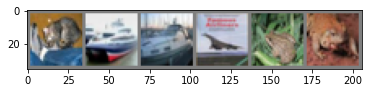

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 72 %
Accuracy of  bird : 52 %
Accuracy of   cat : 44 %
Accuracy of  deer : 54 %
Accuracy of   dog : 50 %
Accuracy of  frog : 68 %
Accuracy of horse : 63 %
Accuracy of  ship : 80 %
Accuracy of truck : 79 %


In [15]:
assert 'Net' in globals().keys(), 'The Net class was not defined earlier. ' + \
                                  'Make sure you read and follow the instructions provided as Important Notes' + \
                                  '(especially, the "Model Class Naming" part).'

cifar_net_path = './cifar_net.pth'

assert os.path.exists(cifar_net_path), 'You have not stored the trained model properly. '+  \
                                       'Make sure you read and follow the instructions provided as Important Notes.'

assert os.path.getsize(cifar_net_path) < 1000000, 'The size of your trained model exceeds 1 MB.'



if 'net' in globals():
    del net
net = Net()
net.load_state_dict(torch.load(cifar_net_path))
net = net.eval()

# Disclaimer: Most of the following code was adopted from Pytorch's Documentation and Examples
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

transformation_list = [transforms.RandomAffine(degrees=30, translate=(0.01, 0.01), scale=(0.9, 1.1),
                                               shear=None, resample=0, fillcolor=0),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

test_pre_tranformation = transforms.Compose(transformation_list)

cifar_root = './data-cfar10'
testset = torchvision.datasets.CIFAR10(root=cifar_root, train=False,
                                       download=False, transform=test_pre_tranformation)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print('----------')
print(f'Overall Testing Accuracy: {100. * sum(class_correct) / sum(class_total)} %%')

Accuracy of plane : 41 %
Accuracy of   car : 50 %
Accuracy of  bird : 31 %
Accuracy of   cat : 46 %
Accuracy of  deer : 46 %
Accuracy of   dog : 39 %
Accuracy of  frog : 58 %
Accuracy of horse : 44 %
Accuracy of  ship : 51 %
Accuracy of truck : 56 %
----------
Overall Testing Accuracy: 46.69 %%
